In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
data = 'data_cleaned.csv'

df = pd.read_csv(data)

In [ ]:
df.shape

(514, 5)

In [ ]:
df.head()

,Provinsi,Kabupaten/Kota,2021,2022,2023
0,PROVINSI ACEH,Simeulue,5.71,6.00,5.85
1,NaN,Aceh Singkil,8.36,6.88,6.84
2,NaN,Aceh Selatan,6.46,4.82,4.73
3,NaN,Aceh Tenggara,6.43,5.09,5.00
4,NaN,Aceh Timur,7.13,8.07,8.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        38 non-null     object 
 1   Kabupaten/Kota  514 non-null    object 
 2   2021            493 non-null    float64
 3   2022            505 non-null    float64
 4   2023            500 non-null    float64
dtypes: float64(3), object(2)
memory usage: 20.2+ KB


In [ ]:
df.isnull().sum()

Provinsi          476
Kabupaten/Kota      0
2021               21
2022                9
2023               14
dtype: int64

In [ ]:
df.drop(['Provinsi'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  514 non-null    object 
 1   2021            493 non-null    float64
 2   2022            505 non-null    float64
 3   2023            500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 16.2+ KB


In [ ]:
df.describe()

,2021,2022,2023
count,493.000000,505.000000,500.000000
mean,5.066755,4.624099,4.403460
std,2.634803,2.296981,2.033193
min,0.410000,0.120000,0.150000
25%,3.180000,2.920000,2.790000
50%,4.560000,4.330000,4.055000
75%,6.550000,6.060000,5.730000
max,13.370000,11.820000,10.860000


In [ ]:
df.head()

,Kabupaten/Kota,2021,2022,2023
0,Simeulue,5.71,6.00,5.85
1,Aceh Singkil,8.36,6.88,6.84
2,Aceh Selatan,6.46,4.82,4.73
3,Aceh Tenggara,6.43,5.09,5.00
4,Aceh Timur,7.13,8.07,8.03


In [ ]:
# Membuat kolom baru 'Tahun Terbaru' yang mengambil data terbaru yang tersedia
df['Tahun Terbaru'] = df[['2023', '2022', '2021']].bfill(axis=1).iloc[:, 0]

# Membuat DataFrame baru hanya dengan kolom 'Kabupaten/Kota' dan 'Tahun Terbaru'
df_result = df[['Kabupaten/Kota', 'Tahun Terbaru']]

In [ ]:
print(df_result)

     Kabupaten/Kota  Tahun Terbaru
0          Simeulue           5.85
1      Aceh Singkil           6.84
2      Aceh Selatan           4.73
3     Aceh Tenggara           5.00
4        Aceh Timur           8.03
..              ...            ...
509          Sorong           4.58
510  Sorong Selatan           3.01
511         Maybrat           4.24
512        Tambrauw           1.30
513    Kota Sorong            9.86

[514 rows x 2 columns]


In [ ]:
df_result.isnull().sum()

Kabupaten/Kota    0
Tahun Terbaru     0
dtype: int64

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  514 non-null    object 
 1   Tahun Terbaru   514 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.2+ KB


In [ ]:
# Mengambil data numerik untuk klasterisasi
X = df_result[['Tahun Terbaru']].values

In [ ]:
print(X)

[[ 5.85]
 [ 6.84]
 [ 4.73]
 [ 5.  ]
 [ 8.03]
 [ 4.42]
 [ 6.07]
 [ 8.17]
 [ 5.92]
 [ 4.14]
 [ 7.07]
 [ 4.08]
 [ 2.65]
 [ 7.21]
 [ 5.74]
 [ 2.88]
 [ 2.45]
 [ 4.34]
 [ 8.03]
 [ 3.92]
 [ 7.73]
 [ 8.78]
 [ 5.69]
 [ 2.31]
 [ 7.45]
 [ 3.49]
 [ 7.81]
 [ 1.03]
 [ 1.3 ]
 [ 5.99]
 [ 6.12]
 [ 5.35]
 [ 1.23]
 [ 2.63]
 [ 8.62]
 [ 6.33]
 [ 3.48]
 [ 0.84]
 [ 0.45]
 [ 1.03]
 [ 4.97]
 [ 5.88]
 [ 4.42]
 [ 5.75]
 [ 3.43]
 [ 4.84]
 [ 2.57]
 [ 0.8 ]
 [ 6.79]
 [ 4.47]
 [ 8.62]
 [ 6.24]
 [ 8.67]
 [ 6.1 ]
 [ 7.57]
 [ 3.67]
 [ 4.13]
 [ 3.23]
 [ 3.92]
 [ 3.41]
 [ 1.95]
 [ 2.58]
 [ 3.35]
 [ 1.81]
 [ 3.96]
 [ 2.1 ]
 [ 3.09]
 [ 3.99]
 [ 5.11]
 [ 7.49]
 [ 5.05]
 [ 2.71]
 [ 5.64]
 [ 1.33]
 [ 4.75]
 [ 4.99]
 [ 4.71]
 [ 5.35]
 [ 6.69]
 [ 4.96]
 [ 3.95]
 [ 5.09]
 [ 2.57]
 [ 6.22]
 [ 6.01]
 [10.86]
 [ 3.72]
 [ 4.98]
 [ 5.49]
 [ 4.99]
 [ 4.84]
 [ 5.68]
 [ 3.56]
 [ 2.94]
 [ 3.33]
 [ 3.81]
 [ 2.68]
 [ 3.14]
 [ 2.72]
 [ 2.41]
 [ 3.2 ]
 [ 5.04]
 [ 2.49]
 [ 2.47]
 [ 1.71]
 [ 2.26]
 [ 5.82]
 [ 3.38]
 [ 3.45]
 [ 7.09]
 [ 4.42]
 

In [ ]:
# finding wcss value for different number of clusters

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Pyth

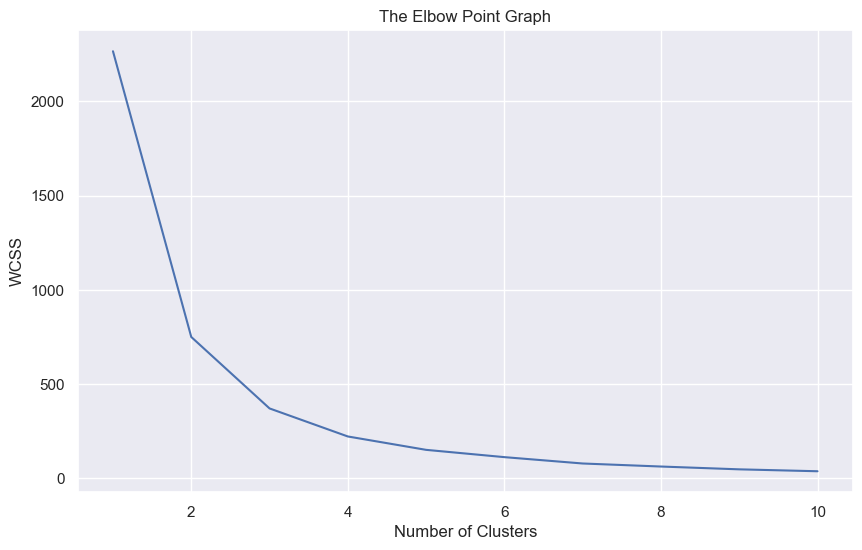

In [ ]:
# plot an elbow graph

sns.set()
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 3

In [ ]:
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    random_state=42
    )
Y = kmeans.fit_predict(X)
print(Y)

[2 1 2 2 1 2 2 1 2 2 1 2 0 1 2 0 0 2 1 2 1 1 2 0 1 0 1 0 0 2 2 2 0 0 1 2 0
 0 0 0 2 2 2 2 0 2 0 0 1 2 1 2 1 2 1 0 2 0 2 0 0 0 0 0 2 0 0 2 2 1 2 0 2 0
 2 2 2 2 1 2 2 2 0 2 2 1 0 2 2 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 1 2
 2 2 2 2 2 2 0 0 1 2 0 2 2 2 2 0 0 0 2 1 2 0 0 2 0 0 2 0 0 2 2 0 2 0 1 0 2
 2 2 2 2 0 2 2 0 0 1 2 1 0 0 0 0 0 1 1 1 2 2 2 2 2 0 0 2 2 1 0 2 0 0 2 0 0
 2 0 1 0 1 2 2 0 2 0 0 2 2 2 0 0 2 0 0 2 0 2 0 0 2 1 1 1 1 1 1 1 2 1 2 1 2
 2 1 1 1 1 1 1 2 0 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 0 0 2 0 0 2 2 0 2 2 0 1 1 1 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2
 2 2 0 2 2 2 0 0 2 1 2 2 2 2 2 0 2 2 2 1 2 0 0 0 2 2 1 2 2 2 2 1 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0 2 1 2 0 0 0 2 1
 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0
 0 0 2 0 1 2 1 2 2 0 0 1 2 2 0 1 0 2 2 2 2 0 2 0 2 0 2 1 1 0 0 0 2 0 0 2 2
 0 2 0 0 2 1 1 2 2 0 2 0 

c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 Clusters - 0, 1, 2

In [ ]:
centroids = kmeans.cluster_centers_
print("Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid for cluster {i}: {centroid}")

Centroids:
Centroid for cluster 0: [2.5374026]
Centroid for cluster 1: [7.9025]
Centroid for cluster 2: [4.96095477]


* Cluster 0
* Cluster 2
* Cluster 1

In [ ]:
range_n_clusters = [2, 3, 4, 5]
db_indices = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    Y = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, Y)
    db_indices.append(db_index)
    print(f"Davies-Bouldin Index for {n_clusters} clusters: {db_index}")

Davies-Bouldin Index for 2 clusters: 0.5743434451856256
Davies-Bouldin Index for 3 clusters: 0.5304718608280816
Davies-Bouldin Index for 4 clusters: 0.5375292293570424
Davies-Bouldin Index for 5 clusters: 0.5337380541187509


c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Pyth

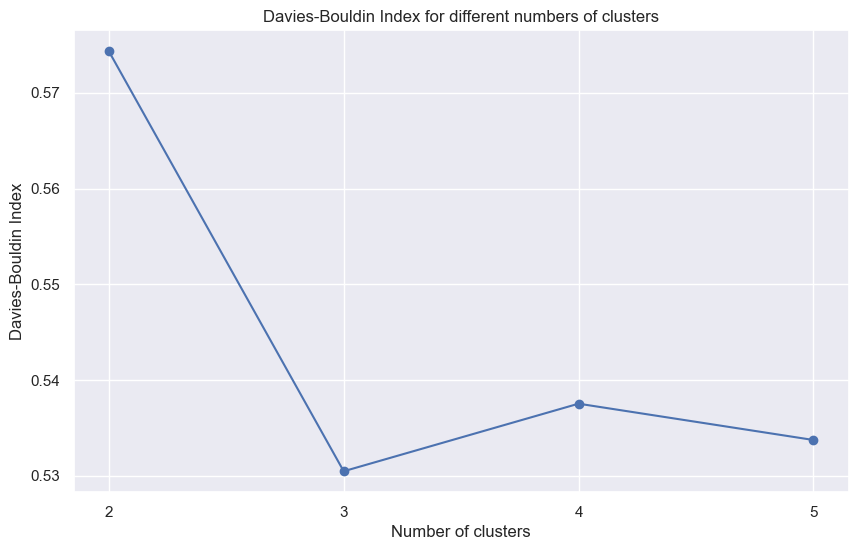

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, db_indices, marker='o')
plt.title('Davies-Bouldin Index for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [ ]:
# Menambahkan kolom 'Kategori' ke DataFrame
df_result['Cluster'] = kmeans.labels_

# Menampilkan DataFrame yang telah diperbarui bersama dengan kategori klaster
print(df_result)

     Kabupaten/Kota  Tahun Terbaru  Cluster  Kategori
0          Simeulue           5.85        2  Menengah
1      Aceh Singkil           6.84        1    Tinggi
2      Aceh Selatan           4.73        2  Menengah
3     Aceh Tenggara           5.00        2  Menengah
4        Aceh Timur           8.03        1    Tinggi
..              ...            ...      ...       ...
509          Sorong           4.58        2  Menengah
510  Sorong Selatan           3.01        0    Rendah
511         Maybrat           4.24        2  Menengah
512        Tambrauw           1.30        0    Rendah
513     Kota Sorong           9.86        1    Tinggi

[514 rows x 4 columns]


C:\Users\Anjelita Malik\AppData\Local\Temp\ipykernel_1932\1512658849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Cluster'] = kmeans.labels_


In [ ]:
print(df_result.groupby('Cluster')['Tahun Terbaru'].describe())

         count      mean       std   min    25%    50%    75%    max
Cluster                                                             
0        231.0  2.537403  0.827027  0.15  2.075  2.630  3.240   3.72
1         84.0  7.902500  1.105765  6.46  7.030  7.715  8.605  11.67
2        199.0  4.960955  0.754019  3.77  4.335  4.950  5.650   6.42


In [ ]:
centroids = kmeans.cluster_centers_
print("Centroids:", centroids)

Centroids: [[3.02300654]
 [6.12875   ]
 [8.44785714]
 [1.58487179]
 [4.50076336]]


Jadi, urutan klaster berdasarkan tingkat pengangguran adalah sebagai berikut:

*  Cluster 0: Rendah
*  Cluster 2: Menengah
*  Cluster 1: Tinggi

In [ ]:
# Dictionary untuk mapping cluster ke kategori
cluster_to_category = {0: 'Rendah', 2: 'Menengah', 1: 'Tinggi'}

# Menambahkan kolom 'Kategori' ke DataFrame
df_result['Kategori'] = df_result['Cluster'].map(cluster_to_category)

# Menampilkan DataFrame yang telah diperbarui bersama dengan kategori klaster
print(df_result)

     Kabupaten/Kota  Tahun Terbaru  Cluster  Kategori
0          Simeulue           5.85        2  Menengah
1      Aceh Singkil           6.84        1    Tinggi
2      Aceh Selatan           4.73        2  Menengah
3     Aceh Tenggara           5.00        2  Menengah
4        Aceh Timur           8.03        1    Tinggi
..              ...            ...      ...       ...
509          Sorong           4.58        2  Menengah
510  Sorong Selatan           3.01        0    Rendah
511         Maybrat           4.24        2  Menengah
512        Tambrauw           1.30        0    Rendah
513     Kota Sorong           9.86        1    Tinggi

[514 rows x 4 columns]


C:\Users\Anjelita Malik\AppData\Local\Temp\ipykernel_1932\3507560022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Kategori'] = df_result['Cluster'].map(cluster_to_category)


In [ ]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import geopandas as gpd

In [ ]:
# Load shapefile of Indonesia's regions (adjust the file path as needed)
gdf = gpd.read_file('D:\Documents\SEMESTER-4\M.Riset\Kodingan\Geospasial Kab-Kota\[LapakGIS.com] Batas_Kabupaten_BIG_PPBW_V1.shp')

In [ ]:
display(gdf)

,METADATA,SRS_ID,WADMKK,WADMPR,geometry
0,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,None,Sumatera Utara,"POLYGON Z ((98.56012 2.89494 0.00001, 98.56065..."
1,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Aceh Barat,Aceh,"POLYGON Z ((96.26952 4.76450 0.00001, 96.27019..."
2,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Aceh Barat Daya,Aceh,"MULTIPOLYGON Z (((96.82554 3.69729 0.00001, 96..."
3,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Aceh Besar,Aceh,"MULTIPOLYGON Z (((95.20715 5.27923 0.00001, 95..."
4,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Aceh Jaya,Aceh,"MULTIPOLYGON Z (((95.56820 4.61051 0.00001, 95..."
...,...,...,...,...,...
515,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Way Kanan,Lampung,"POLYGON Z ((104.93779 -4.19134 0.00001, 104.93..."
516,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Wonogiri,Jawa Tengah,"POLYGON Z ((111.15463 -7.71448 0.00001, 111.15..."
517,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Wonosobo,Jawa Tengah,"POLYGON Z ((109.92612 -7.18992 0.00001, 109.92..."
518,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Yahukimo,Papua Pegunungan,"MULTIPOLYGON Z (((139.88762 -5.06333 0.00001, ..."


<Axes: >

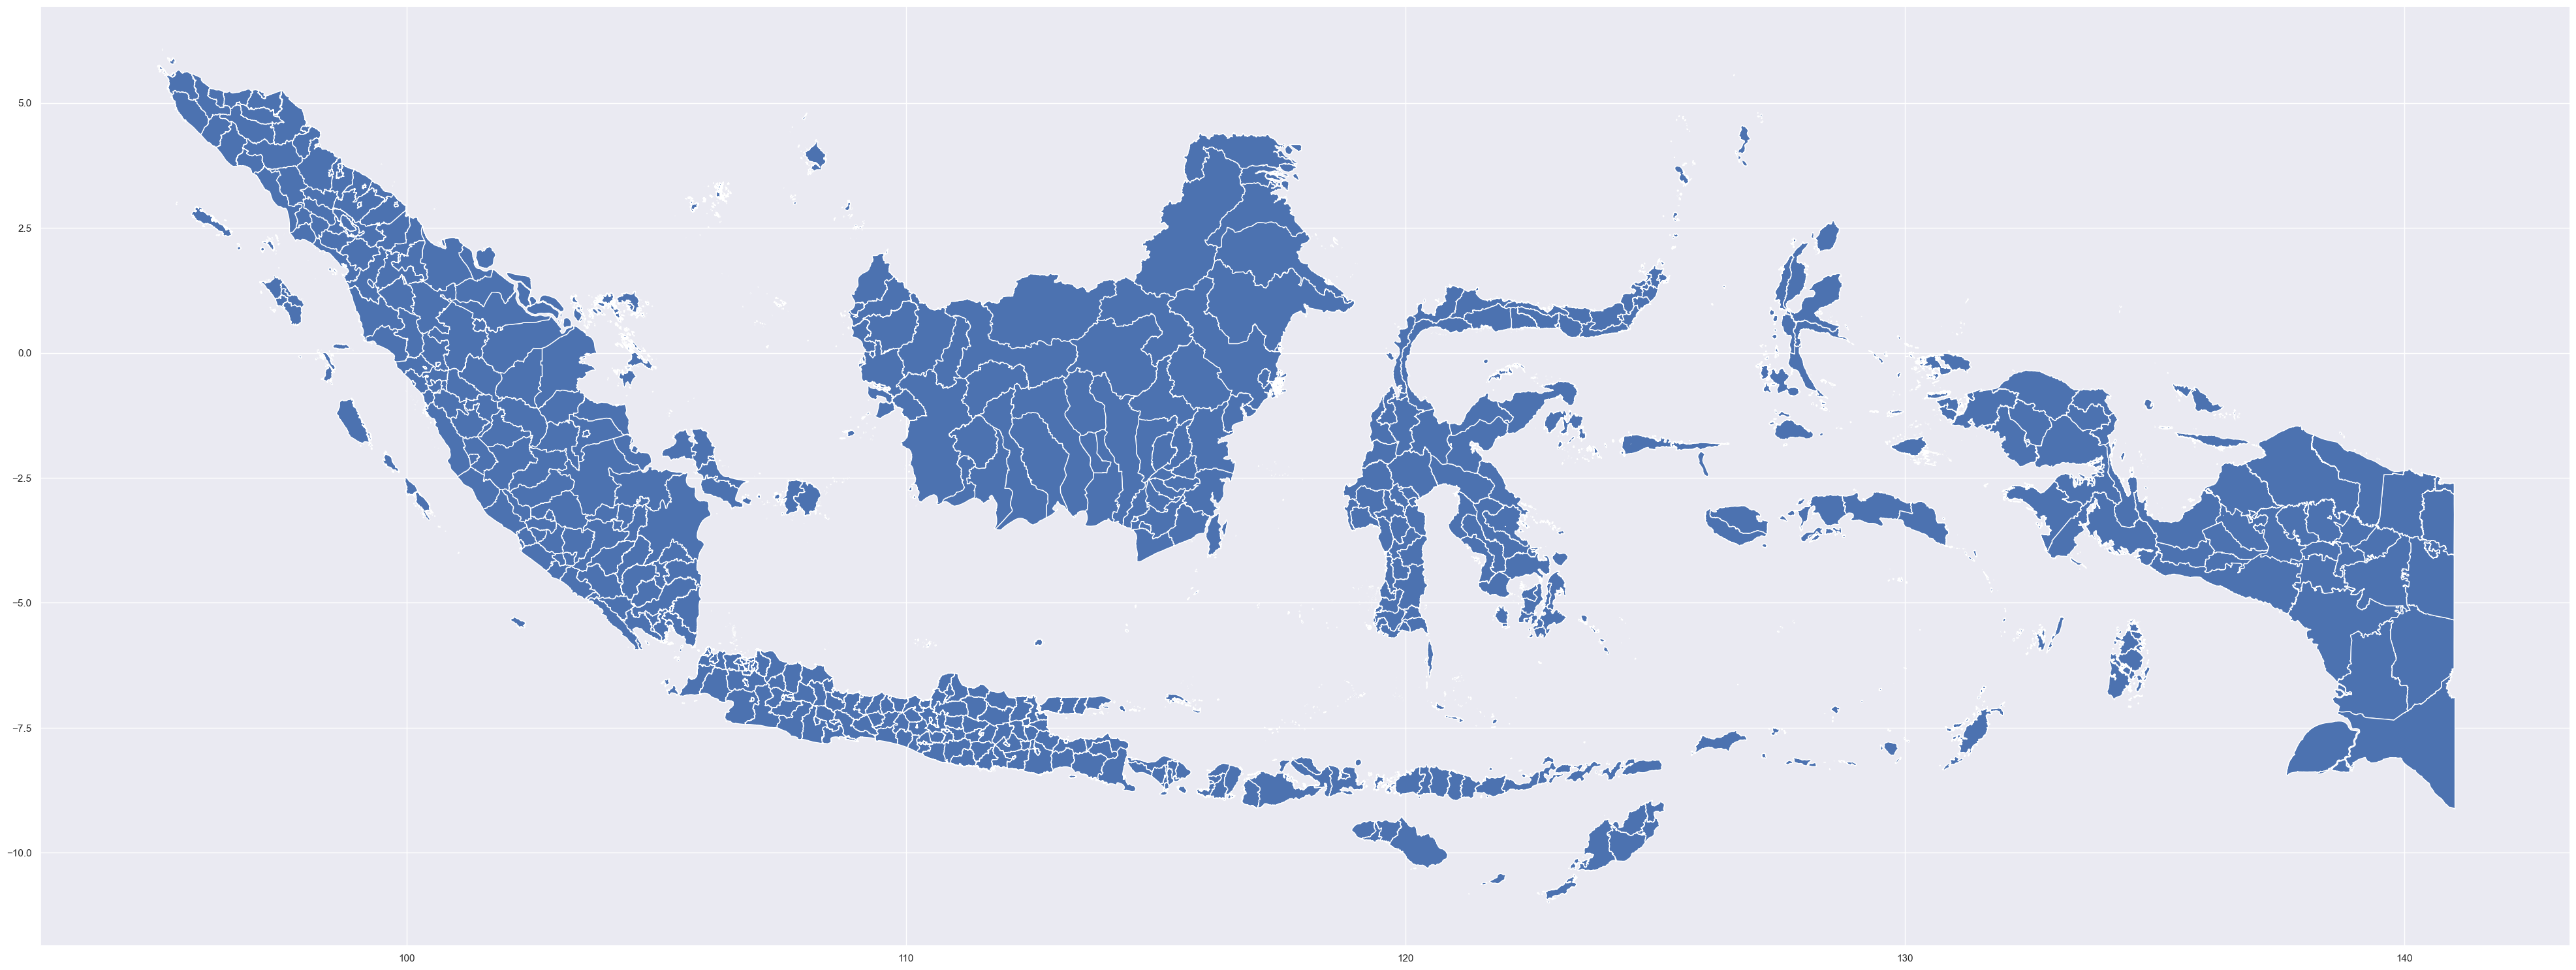

In [ ]:
plt.rcParams ['figure.figsize'] = [50,70]
gdf.plot()

In [ ]:
display(df_result)

,Kabupaten/Kota,Tahun Terbaru,Cluster,Kategori
0,Simeulue,5.85,2,Menengah
1,Aceh Singkil,6.84,1,Tinggi
2,Aceh Selatan,4.73,2,Menengah
3,Aceh Tenggara,5.00,2,Menengah
4,Aceh Timur,8.03,1,Tinggi
...,...,...,...,...
509,Sorong,4.58,2,Menengah
510,Sorong Selatan,3.01,0,Rendah
511,Maybrat,4.24,2,Menengah
512,Tambrauw,1.30,0,Rendah


# Coba Lagi

,METADATA,SRS_ID,WADMKK,WADMPR,geometry
0,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,None,Sumatera Utara,"POLYGON Z ((98.56012 2.89494 0.00001, 98.56065..."
1,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Aceh Barat,Aceh,"POLYGON Z ((96.26952 4.76450 0.00001, 96.27019..."
2,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Aceh Barat Daya,Aceh,"MULTIPOLYGON Z (((96.82554 3.69729 0.00001, 96..."
3,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Aceh Besar,Aceh,"MULTIPOLYGON Z (((95.20715 5.27923 0.00001, 95..."
4,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Aceh Jaya,Aceh,"MULTIPOLYGON Z (((95.56820 4.61051 0.00001, 95..."
...,...,...,...,...,...
515,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Way Kanan,Lampung,"POLYGON Z ((104.93779 -4.19134 0.00001, 104.93..."
516,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Wonogiri,Jawa Tengah,"POLYGON Z ((111.15463 -7.71448 0.00001, 111.15..."
517,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Wonosobo,Jawa Tengah,"POLYGON Z ((109.92612 -7.18992 0.00001, 109.92..."
518,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Yahukimo,Papua Pegunungan,"MULTIPOLYGON Z (((139.88762 -5.06333 0.00001, ..."


,Kabupaten/Kota,Tahun Terbaru,Cluster,Kategori
0,Simeulue,5.85,2,Menengah
1,Aceh Singkil,6.84,1,Tinggi
2,Aceh Selatan,4.73,2,Menengah
3,Aceh Tenggara,5.00,2,Menengah
4,Aceh Timur,8.03,1,Tinggi
...,...,...,...,...
509,Sorong,4.58,2,Menengah
510,Sorong Selatan,3.01,0,Rendah
511,Maybrat,4.24,2,Menengah
512,Tambrauw,1.30,0,Rendah


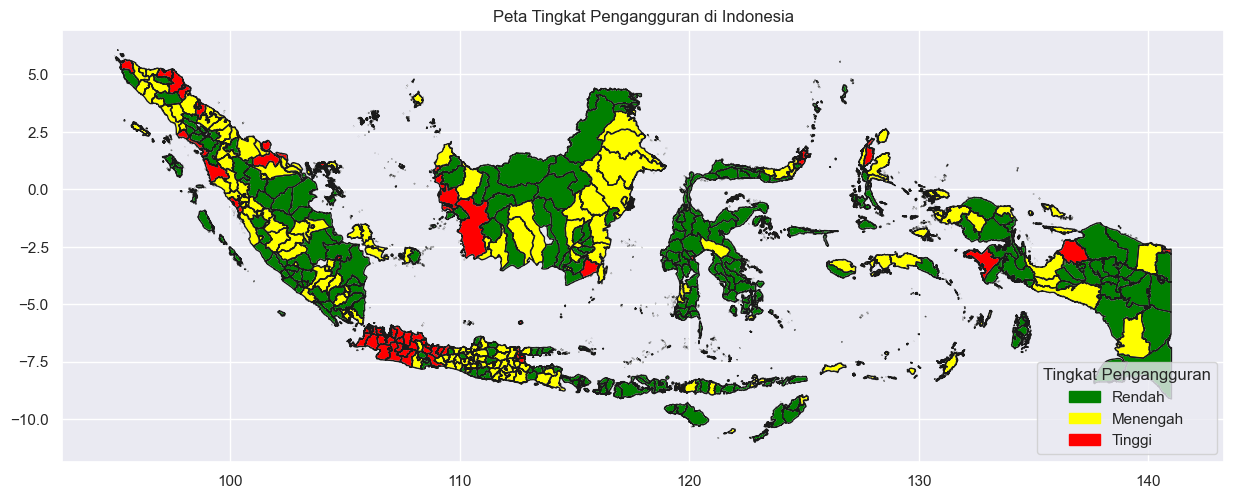

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile of Indonesia's regions (adjust the file path as needed)
gdf = gpd.read_file('D:\\Documents\\SEMESTER-4\\M.Riset\\Kodingan\\Geospasial Kab-Kota\\[LapakGIS.com] Batas_Kabupaten_BIG_PPBW_V1.shp')

# Display the GeoDataFrame
display(gdf)

# Assuming df_result is your DataFrame with 'Kabupaten/Kota', 'Cluster', and 'Kategori' columns
# Display df_result DataFrame
display(df_result)

# Merge shapefile GeoDataFrame with your data DataFrame
merged = gdf.merge(df_result, left_on='WADMKK', right_on='Kabupaten/Kota')

# Define a color map for the categories
category_colors = {'Rendah': 'green', 'Menengah': 'yellow', 'Tinggi': 'red'}

# Create a column in the GeoDataFrame for the colors
merged['color'] = merged['Kategori'].map(category_colors)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=1, edgecolor='k')
merged.plot(ax=ax, color=merged['color'])

# Add a legend
import matplotlib.patches as mpatches
legend_labels = {'Rendah': 'green', 'Menengah': 'yellow', 'Tinggi': 'red'}
patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches, title="Tingkat Pengangguran", loc='lower right')

# Add a title
plt.title('Peta Tingkat Pengangguran di Indonesia')

# Show the plot
plt.show()


### Cek Kesamaan Nama Wilayah

In [ ]:
# Lihat nama-nama kolom
print(gdf.columns)
print(df_result.columns)

# Cek kesamaan nama wilayah
geo_wilayah = set(gdf['WADMKK'])
pengangguran_wilayah = set(df_result['Kabupaten/Kota'])

# Wilayah yang ada di gdf tapi tidak ada di pengangguran_data
missing_in_pengangguran = geo_wilayah - pengangguran_wilayah
# Wilayah yang ada di pengangguran_data tapi tidak ada di geodata
missing_in_geo = pengangguran_wilayah - geo_wilayah

print("Wilayah yang ada di geodata tapi tidak ada di pengangguran_data:")
print(missing_in_pengangguran)
print("\nWilayah yang ada di pengangguran_data tapi tidak ada di geodata:")
print(missing_in_geo)


Index(['METADATA', 'SRS_ID', 'WADMKK', 'WADMPR', 'geometry'], dtype='object')
Index(['Kabupaten/Kota', 'Tahun Terbaru', 'Cluster', 'Kategori'], dtype='object')
Wilayah yang ada di geodata tapi tidak ada di pengangguran_data:
{'Kota Administrasi Jakarta Timur', 'Kota Administrasi Jakarta Selatan', 'Kep. Siau Tagulandang Biaro', 'Sidenreng Rappang', 'Kota Administrasi Jakarta Pusat', None, 'Kota Administrasi Jakarta Utara', 'Pahuwato/Pahuwato/Boalemo', 'Bintan/Mempawah', 'Pahuwato/Boalemo/Pahuwato', 'Kota Palangkaraya', 'Kota Pangkal Pinang', 'Kota Bau Bau', 'Pahuwato/Boalemo', 'Toli Toli', 'Penukal Abab Lematang Ilir', 'Administrasi Kepulauan Seribu', 'Kota Administrasi Jakarta Barat'}

Wilayah yang ada di pengangguran_data tapi tidak ada di geodata:
{'Kota Baubau', 'Sidrap', 'Penungkal Abab Lematang Ilir', 'Jakarta Barat', 'Tolitoli', 'Jakarta Pusat', 'Jakarta Timur', 'Kepulauan Seribu', 'Jakarta Selatan', 'Kota Pangkalpinang', 'Palangka Raya', 'Jakarta Utara'}


In [ ]:
# Hilangkan spasi tambahan di awal dan akhir nama wilayah
gdf['WADMKK'] = gdf['WADMKK'].str.strip()
df_result['Kabupaten/Kota'] = df_result['Kabupaten/Kota'].str.strip()

# Cek lagi kesamaan nama wilayah
geo_wilayah = set(gdf['WADMKK'])
pengangguran_wilayah = set(df_result['Kabupaten/Kota'])

missing_in_pengangguran = geo_wilayah - pengangguran_wilayah
missing_in_geo = pengangguran_wilayah - geo_wilayah

print("Wilayah yang ada di geodata tapi tidak ada di pengangguran_data:")
print(missing_in_pengangguran)
print("\nWilayah yang ada di pengangguran_data tapi tidak ada di geodata:")
print(missing_in_geo)


Wilayah yang ada di geodata tapi tidak ada di pengangguran_data:
{'Kota Administrasi Jakarta Timur', 'Kota Administrasi Jakarta Selatan', 'Kep. Siau Tagulandang Biaro', 'Sidenreng Rappang', 'Kota Administrasi Jakarta Pusat', None, 'Kota Administrasi Jakarta Utara', 'Pahuwato/Pahuwato/Boalemo', 'Bintan/Mempawah', 'Pahuwato/Boalemo/Pahuwato', 'Kota Palangkaraya', 'Kota Pangkal Pinang', 'Kota Bau Bau', 'Pahuwato/Boalemo', 'Toli Toli', 'Penukal Abab Lematang Ilir', 'Administrasi Kepulauan Seribu', 'Kota Administrasi Jakarta Barat'}

Wilayah yang ada di pengangguran_data tapi tidak ada di geodata:
{'Kota Baubau', 'Sidrap', 'Penungkal Abab Lematang Ilir', 'Jakarta Barat', 'Tolitoli', 'Jakarta Pusat', 'Jakarta Timur', 'Kepulauan Seribu', 'Jakarta Selatan', 'Kota Pangkalpinang', 'Palangka Raya', 'Jakarta Utara'}


C:\Users\Anjelita Malik\AppData\Local\Temp\ipykernel_1932\703267739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Kabupaten/Kota'] = df_result['Kabupaten/Kota'].str.strip()


In [ ]:
def to_proper_case(text):
    return text.title()

# Membuat dictionary untuk menyelaraskan nama wilayah yang berbeda
name_corrections = {
    'pahuwato/boalemo': 'pohuwato',
    'kep. siau tagulandang biaro': 'kepulauan sitaro',
    'muko muko': 'mukomuko',  # Dari gdf ke df_result
    'pangkep': 'pangkajene kepulauan',  # Dari df_result ke gdf
    'pangkajene kepulauan': 'pangkep',  # Dari gdf ke df_result
    'pohuwato': 'pahuwato',  # Dari df_result ke gdf
    'tanjung pinang': 'tanjungpinang',  # Dari gdf ke df_result
    'tanjungpinang': 'tanjung pinang',  # Dari df_result ke gdf
    'mukomuko': 'muko muko',  # Dari df_result ke gdf
    'kepulauan sitaro': 'kepulauan siau tagulandang biaro',  # Dari df_result ke gdf
    'subulussalam': 'kota subulussalam',  # Dari df_result ke gdf
    'ternate': 'kota ternate',  # Dari df_result ke gdf
    'administrasi kepulauan seribu': 'kepulauan seribu',  # Dari df_result ke gdf
    'tidore kepulauan': 'kota tidore kepulauan',  # Dari df_result ke gdf
    'makassar': 'kota makassar',  # Dari df_result ke gdf
    'prabumulih': 'kota prabumulih',  # Dari df_result ke gdf
    'pagar alam': 'kota pagar alam',  # Dari df_result ke gdf
    'binjai': 'kota binjai',  # Dari df_result ke gdf
    'metro': 'kota metro',  # Dari df_result ke gdf
    'bandar lampung': 'kota bandar lampung',  # Dari df_result ke gdf
    'palopo': 'kota palopo',  # Dari df_result ke gdf
    'sidenreng rappang': 'sidrap',  # Dari df_result ke gdf
    'penukal abab lematang ilir': 'penungkal abab lematang ilir',  # Dari df_result ke gdf
    'balikpapan': 'kota balikpapan',  # Dari df_result ke gdf
    'toba': 'toba samosir',  # Dari df_result ke gdf
    'labuhan batu': 'labuhanbatu',  # Dari df_result ke gdf
    'lhokseumawe': 'kota lhokseumawe',  # Dari df_result ke gdf
    'banda aceh': 'kota banda aceh',  # Dari df_result ke gdf
    'batam': 'kota batam',  # Dari df_result ke gdf
    'lubuk linggau': 'kota lubuk linggau',  # Dari df_result ke gdf
    'banjarbaru': 'kota banjarbaru',  # Dari df_result ke gdf
    'tarakan': 'kota tarakan',  # Dari df_result ke gdf
    'pangkalpinang': 'kota pangkalpinang',  # Dari df_result ke gdf
    'dumai': 'kota dumai',  # Dari df_result ke gdf
    'palembang': 'kota palembang',  # Dari df_result ke gdf
    'samarinda': 'kota samarinda',  # Dari df_result ke gdf
    'tebing tinggi': 'kota tebing tinggi',  # Dari df_result ke gdf
    'pekanbaru': 'kota pekanbaru',  # Dari df_result ke gdf
    'tojo una-una': 'tojo una una',  # Dari df_result ke gdf
    'parepare': 'kota pare pare',  # Dari df_result ke gdf
    'medan': 'kota medan',  # Dari df_result ke gdf
    'kulonprogo': 'kulon progo',  # Dari df_result ke gdf
    'pematangsiantar': 'kota pematangsiantar',  # Dari df_result ke gdf
    'fakfak': 'fak fak',  # Dari df_result ke gdf
    'labuhanbatu utara': 'labuhanbatu utara',  # Dari df_result ke gdf
    'langsa': 'kota langsa',  # Dari df_result ke gdf
    'bau-bau': 'kota bau bau',  # Dari df_result ke gdf
    'tual': 'kota tual',  # Dari df_result ke gdf
    'sabng': 'kota sabang',  # Dari df_result ke gdf
    'bontang': 'kota bontang',  # Dari df_result ke gdf
    'gunungsitoli': 'kota gunungsitoli',  # Dari df_result ke gdf
    'padangsidimpuan': 'kota padang sidempuan',  # Dari df_result ke gdf
    'palangkaraya': 'kota palangkaraya',  # Dari df_result ke gdf
    'tanjungbalai': 'kota tanjung balai',  # Dari df_result ke gdf
    'ambon': 'kota ambon',  # Dari df_result ke gdf
    'sibolga': 'kota sibolga',  # Dari df_result ke gdf
    'Tanjungpinang': 'Kota Tanjung Pinang',
    'Toli Toli': 'Tolitoli',
    'Kota Administrasi Jakarta Selatan': 'Jakarta Selatan',
    'Kota Administrasi Jakarta Pusat': 'Jakarta Pusat',
    'Kota Banjar Baru': 'Kota Banjarbaru',
    'Kota Pangkal Pinang': 'Kota Pangkalpinang',
    'Pare Pare': 'Kota Pare Pare',
    'Kota Administrasi Jakarta Barat': 'Jakarta Barat',
    'Labuanbatu Utara': 'Labuhanbatu Utara',
    'Kota Bau Bau': 'Kota Baubau',
    'Sabang': 'Kota Sabang',
    'Kota Administrasi Jakarta Utara': 'Jakarta Utara',
    'Kota Administrasi Jakarta Timur': 'Jakarta Timur',
    'Kota Palangkaraya': 'Palangka Raya'
}

# Ubah semua kunci dan nilai dalam dictionary menjadi proper case
name_corrections_proper = {to_proper_case(k): to_proper_case(v) for k, v in name_corrections.items()}


# Terapkan koreksi nama wilayah
gdf['WADMKK'] = gdf['WADMKK'].replace(name_corrections_proper)
df_result['Kabupaten/Kota'] = df_result['Kabupaten/Kota'].replace(name_corrections_proper)

# Cek lagi kesamaan nama wilayah
geo_wilayah = set(gdf['WADMKK'])
pengangguran_wilayah = set(df_result['Kabupaten/Kota'])

missing_in_pengangguran = geo_wilayah - pengangguran_wilayah
missing_in_geo = pengangguran_wilayah - geo_wilayah

print("Wilayah yang ada di geodata tapi tidak ada di pengangguran_data:")
print(missing_in_pengangguran)
print("\nWilayah yang ada di pengangguran_data tapi tidak ada di geodata:")
print(missing_in_geo)


Wilayah yang ada di geodata tapi tidak ada di pengangguran_data:
{'Bintan/Mempawah', None, 'Pahuwato/Boalemo/Pahuwato', 'Pahuwato/Pahuwato/Boalemo'}

Wilayah yang ada di pengangguran_data tapi tidak ada di geodata:
set()


C:\Users\Anjelita Malik\AppData\Local\Temp\ipykernel_1932\2083739064.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Kabupaten/Kota'] = df_result['Kabupaten/Kota'].replace(name_corrections_proper)


In [ ]:
# Membuat dictionary untuk menyelaraskan nama wilayah yang berbeda
name_corrections = {
    'Tanjungpinang': 'Kota Tanjung Pinang',
    'Pangkep': 'Pangkajene Kepulauan',
    'Mukomuko': 'Muko Muko'
}

# Terapkan koreksi nama wilayah
gdf['WADMKK'] = gdf['WADMKK'].replace(name_corrections)
df_result['Kabupaten/Kota'] = df_result['Kabupaten/Kota'].replace(name_corrections)

# Cek lagi kesamaan nama wilayah
geo_wilayah = set(gdf['WADMKK'])
pengangguran_wilayah = set(df_result['Kabupaten/Kota'])

missing_in_pengangguran = geo_wilayah - pengangguran_wilayah
missing_in_geo = pengangguran_wilayah - geo_wilayah

print("Wilayah yang ada di geodata tapi tidak ada di pengangguran_data:")
print(missing_in_pengangguran)
print("\nWilayah yang ada di pengangguran_data tapi tidak ada di geodata:")
print(missing_in_geo)


Wilayah yang ada di geodata tapi tidak ada di pengangguran_data:
{'Bintan/Mempawah', None, 'Pahuwato/Boalemo/Pahuwato', 'Pahuwato/Pahuwato/Boalemo'}

Wilayah yang ada di pengangguran_data tapi tidak ada di geodata:
set()


C:\Users\Anjelita Malik\AppData\Local\Temp\ipykernel_1932\782362140.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Kabupaten/Kota'] = df_result['Kabupaten/Kota'].replace(name_corrections)


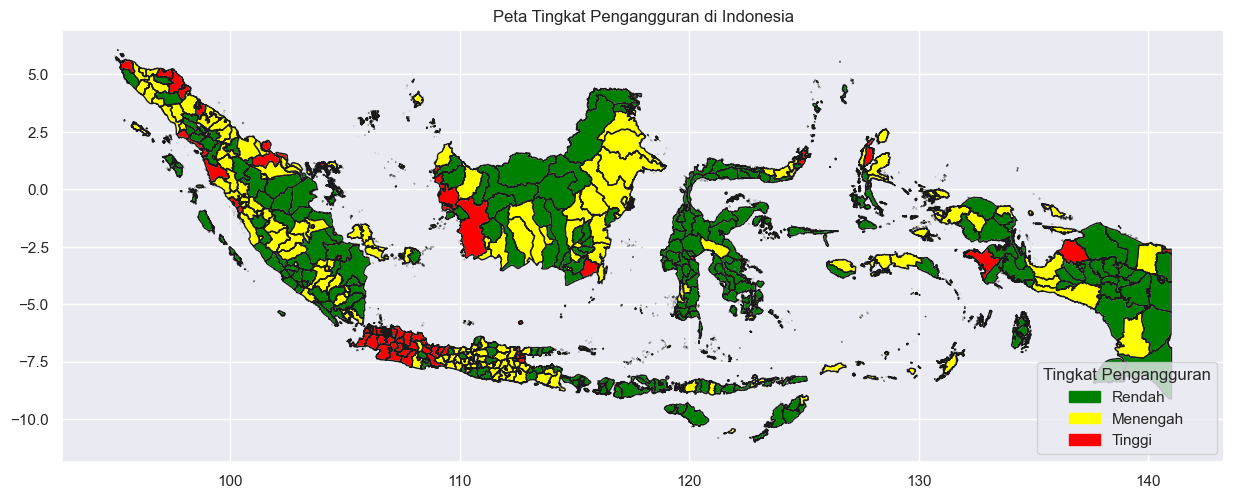

In [ ]:
# Merge shapefile GeoDataFrame with your data DataFrame
merged = gdf.merge(df_result, left_on='WADMKK', right_on='Kabupaten/Kota')

# Define a color map for the categories
category_colors = {'Rendah': 'green', 'Menengah': 'yellow', 'Tinggi': 'red'}

# Create a column in the GeoDataFrame for the colors
merged['color'] = merged['Kategori'].map(category_colors)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=1, edgecolor='k')
merged.plot(ax=ax, color=merged['color'])

# Add a legend
legend_labels = {'Rendah': 'green', 'Menengah': 'yellow', 'Tinggi': 'red'}
patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches, title="Tingkat Pengangguran", loc='lower right')

# Add a title
plt.title('Peta Tingkat Pengangguran di Indonesia')

# Show the plot
plt.show()